In [1]:
import numpy as np
import pandas as pd
import string
import os
import matplotlib.pyplot as plt
from collections import Counter 
import tqdm
from multiprocessing import Pool,cpu_count

In [35]:
df = pd.read_csv('/home/angps/Documents/Quotes_generation/data/quotes.csv')

In [36]:
df.head()

,Quotes
0,You've gotta dance like there's nobody watchin...
1,You know you're in love when you can't fall as...
2,A friend is someone who knows all about you an...
3,Darkness cannot drive out darkness: only light...
4,We accept the love we think we deserve.


In [37]:
#dataframe of words used
def df_word(df):
    vocab = []
    for txt in df["Quotes"]:
        vocab.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocab)) + ' unique words')
    ct = Counter(vocab)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df)
dfword.head(5)

Vocabulary Size: 574785 unique words


,word,count
0,the,767402
1,to,519532
2,of,471216
3,and,468157
4,a,399102


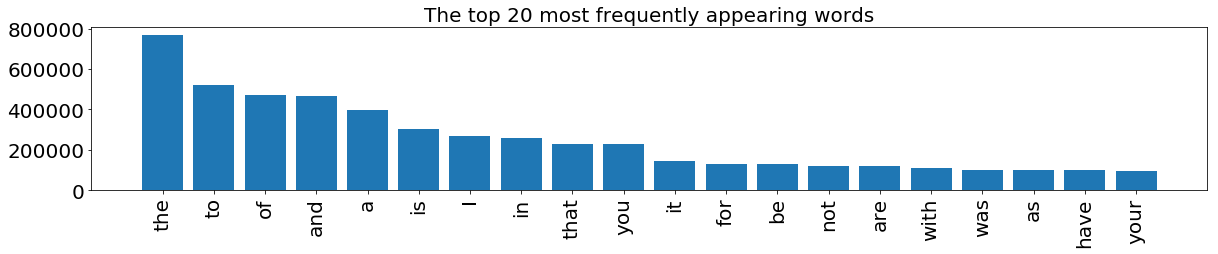

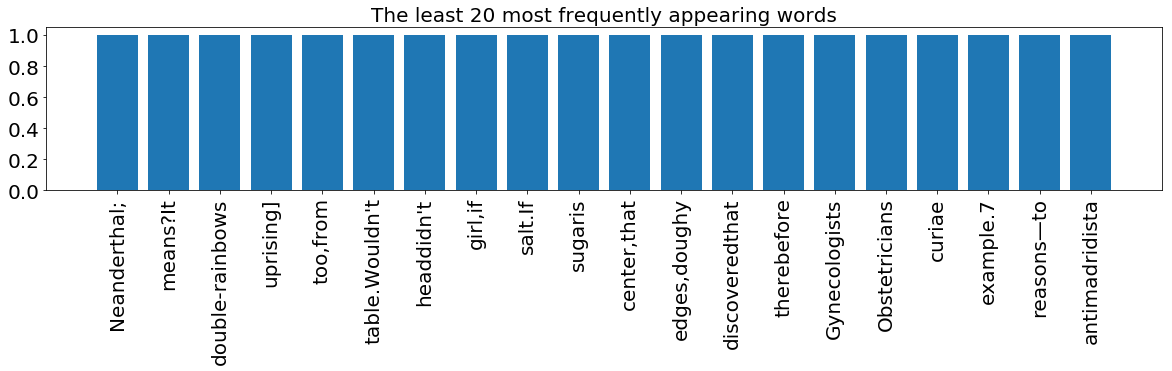

In [38]:
topn = 20

def plthist(dfsub,title):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 20 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 20 most frequently appearing words")

In [39]:
#def remove_punctuation(text_original):
    #return ''.join(c for c in text_original if c not in string.punctuation)
def add_space_after_punc(text):
    punc = [',','.',';',':','?','!']
    new = ''
    for c in range(len(text)-1):
        if text[c] in punc and text[c+1]!=' ':
            new+=text[c]+' '
        elif text[c] in punc and text[c+1]==' ':
            new+=text[c]
            c+=1
        else:
            new+=text[c]
    return new + text[-1]

def remove_single_character(text):
    len_more_than_one= ""
    words = text.split()
    for w in range(len(words)):
        if len(words[w]) > 1 and words[w]!='I'.lower():
            if w==0:
                len_more_than_one += words[w]
            else:
                len_more_than_one+= " " + words[w]
    return(len_more_than_one)

def text_clean(df):
    for i, quotes in enumerate(df["Quotes"].values):
        df["Quotes"].iloc[i] = add_space_after_punc(quotes.lower())
        df["Quotes"].iloc[i] = remove_single_character(quotes)
        df["Quotes"].iloc[i] = quotes.lower()
        if quotes[-1]==".":
            df["Quotes"].iloc[i] = df["Quotes"].iloc[i][:-1]
    return df

In [40]:

def parallelize_dataframe(df, func):
    num_cores = cpu_count()-2  
    num_partitions = num_cores #number of partitions to split dataframe
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


df = parallelize_dataframe(df,text_clean)

In [14]:
'''
def add_start_end(captions):
    caps = []
    for txt in captions:
        txt = 'startq ' + txt + ' endq'
        caps.append(txt)
    return(caps)
df["Quotes"] = add_start_end(df["Quotes"])
df.head()
'''

,Quotes
0,startq gotta dance like nobody like never be ...
1,startq You know in love when you fall asleep ...
2,startq A friend is someone who knows all abou...
3,startq Darkness cannot drive out only light c...
4,startq We accept the love we think we endq


In [42]:
df.to_csv('cleaned_quotes.csv')

In [43]:
df.head()

,Quotes
0,you've gotta dance like there's nobody watchin...
1,you know you're in love when you can't fall as...
2,a friend is someone who knows all about you an...
3,darkness cannot drive out darkness: only light...
4,we accept the love we think we deserve


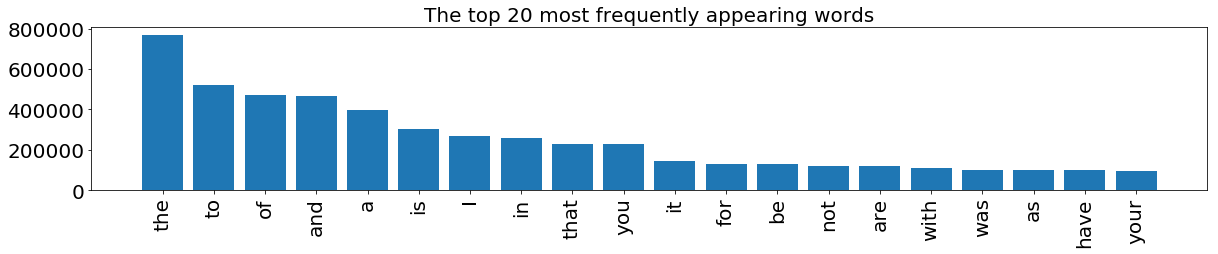

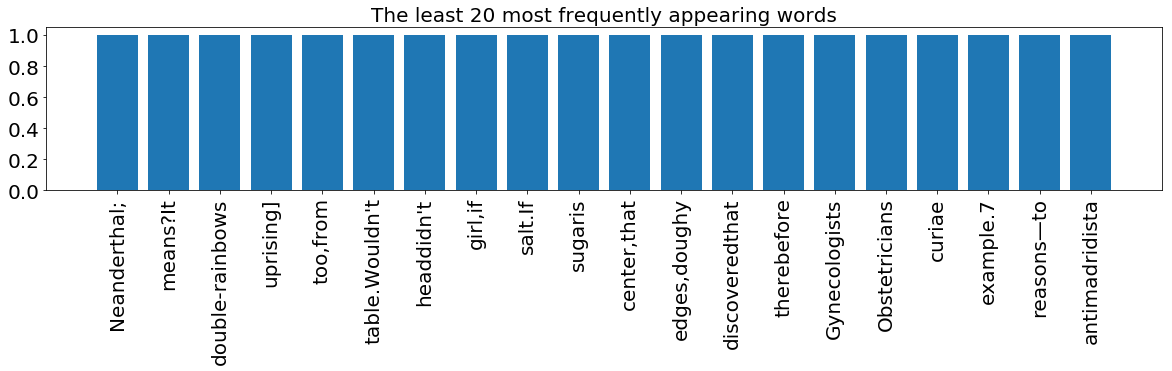

In [44]:
topn = 20

def plthist(dfsub,title):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:],
        title="The top 20 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 20 most frequently appearing words")

In [2]:
df = pd.read_csv('/home/angps/Documents/Quotes_generation/data/cleaned_quotes.csv')

In [3]:
#dataframe of words used
def df_word(df):
    vocab = []
    for txt in df["Quotes"]:
        vocab.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocab)) + ' unique words')
    ct = Counter(vocab)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df)
dfword.head(5)

Vocabulary Size: 516975 unique words


,word,count
0,the,850952
1,to,532647
2,and,497407
3,of,474072
4,a,421994
